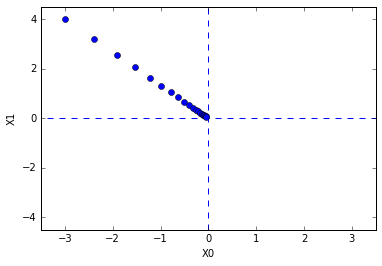

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
# from gradient_2d import numerical_gradient

def  _numerical_gradient_no_batch(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)   #f(x+h)
        
        x[idx] = tmp_val - h
        fxh2 = f(x) #f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val #値戻し
        
    return grad

def  numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
            
        return grad
    
def  function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)
    
def  tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append( x.copy())
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x, np.array(x_history)

def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr,step_num=step_num)
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()